# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from plotnine import *


In [10]:
!pip install palmerpenguins

In [11]:
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
# dummify non-species
# penguins = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)*1
# penguins.head()

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [103]:
# DATA

# define variables
X = penguins.drop(columns=["species"])
y = penguins["species"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [104]:
# KNN MODELs

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"), ## use drop="first" to holdout one of the dummy variable columns as reference
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

knn_pipe = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier())]
).set_output(transform="pandas")

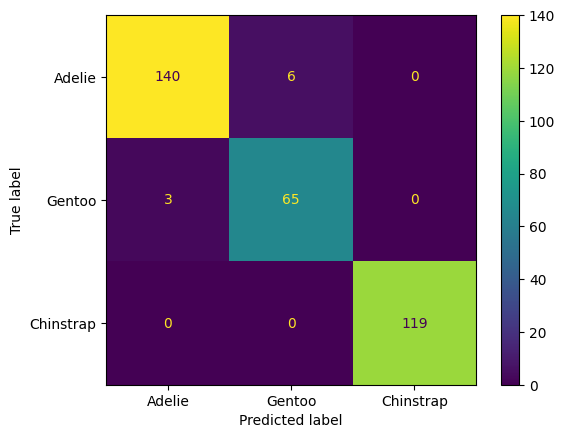

In [106]:
# fitting model on KNN 3

knn_3 = knn_pipe.set_params(knn__n_neighbors=3)
y_pred_3 = cross_val_predict(knn_3, X, y, cv=5)
cm_knn3 = confusion_matrix(y, y_pred_3)

# confusion matrix

labels = penguins["species"].unique()

ConfusionMatrixDisplay(cm_knn3, display_labels = labels).plot()

In [108]:
acc_knn_3 = accuracy_score(y, y_pred_3)
print(acc_knn_3)

0.972972972972973


In [109]:
# classification report  KNN 3

print(classification_report(y, y_pred_3))

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97       146
   Chinstrap       0.92      0.96      0.94        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.97       333
   macro avg       0.96      0.97      0.97       333
weighted avg       0.97      0.97      0.97       333



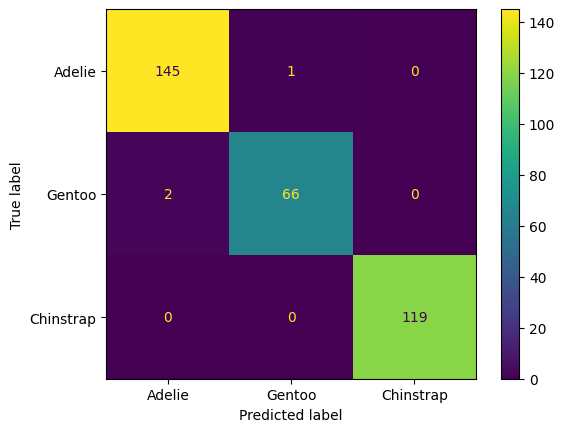

In [110]:
# fitting model on KNN 10

knn_10 = knn_pipe.set_params(knn__n_neighbors=10)
y_pred_10 = cross_val_predict(knn_10, X, y, cv=5)
cm_knn10 = confusion_matrix(y, y_pred_10)

# confusion matrix

labels = penguins["species"].unique()

ConfusionMatrixDisplay(cm_knn10, display_labels = labels).plot()

In [111]:
acc_knn_10 = accuracy_score(y, y_pred_10)
print(acc_knn_10)

0.990990990990991


In [112]:
# classification report  KNN 10

print(classification_report(y, y_pred_10))

              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [113]:
# Decision Tree MODELs

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"), ## use drop="first" to holdout one of the dummy variable columns as reference
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

tree_pipe = Pipeline(
  [("preprocessing", ct),
  ("tree", DecisionTreeClassifier())]
).set_output(transform="pandas")

In [71]:
# fitting models on different Tree

#tree_3 = tree_pipe.set_params(tree__max_depth=3)
#tree_10 = tree_pipe.set_params(tree__max_depth=10)

In [114]:
# fitting models on Tree 0.01

tree_1 = tree_pipe.set_params(tree__min_impurity_decrease = 0.01)

In [115]:
# predict y's

y_pred_1 = cross_val_predict(tree_1, X, y, cv=5)

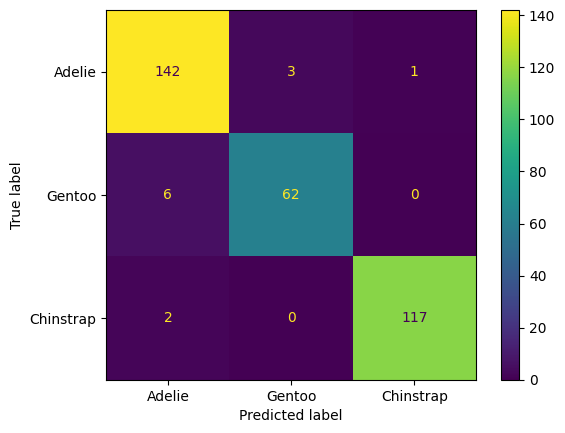

In [116]:
# confusion matrix

cm_tree_1 = confusion_matrix(y, y_pred_1)

labels = penguins["species"].unique()

ConfusionMatrixDisplay(cm_tree_1, display_labels = labels).plot()

In [117]:
# accuracy score

acc_tree_1 = accuracy_score(y, y_pred_1)
print(acc_tree_1)

0.963963963963964


In [118]:
# classification report  TREE 0.01

print(classification_report(y, y_pred_1))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       146
   Chinstrap       0.95      0.91      0.93        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333



In [120]:
# fitting models on Tree 0.4

tree_4 = tree_pipe.set_params(tree__min_impurity_decrease = 0.4)

In [121]:
# predict y's

y_pred_4 = cross_val_predict(tree_4, X, y, cv=5)

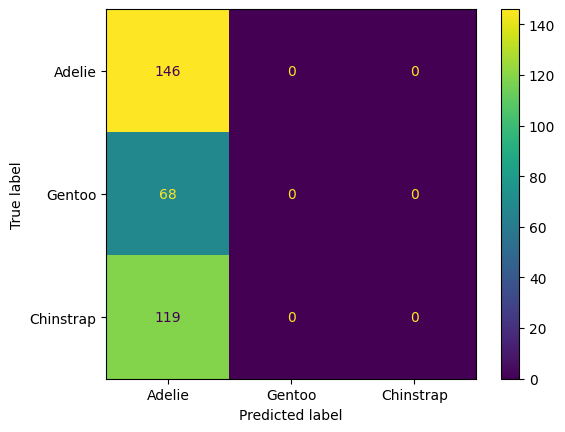

In [122]:
# confusion matrix

cm_tree_4 = confusion_matrix(y, y_pred_4)

labels = penguins["species"].unique()

ConfusionMatrixDisplay(cm_tree_4, display_labels = labels).plot()

In [123]:
# accuracy score

acc_tree_4 = accuracy_score(y, y_pred_4)
print(acc_tree_4)

0.43843843843843844


In [119]:
# classification report  TREE 0.4

print(classification_report(y, y_pred_1))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96       146
   Chinstrap       0.95      0.91      0.93        68
      Gentoo       0.99      0.98      0.99       119

    accuracy                           0.96       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.96      0.96      0.96       333



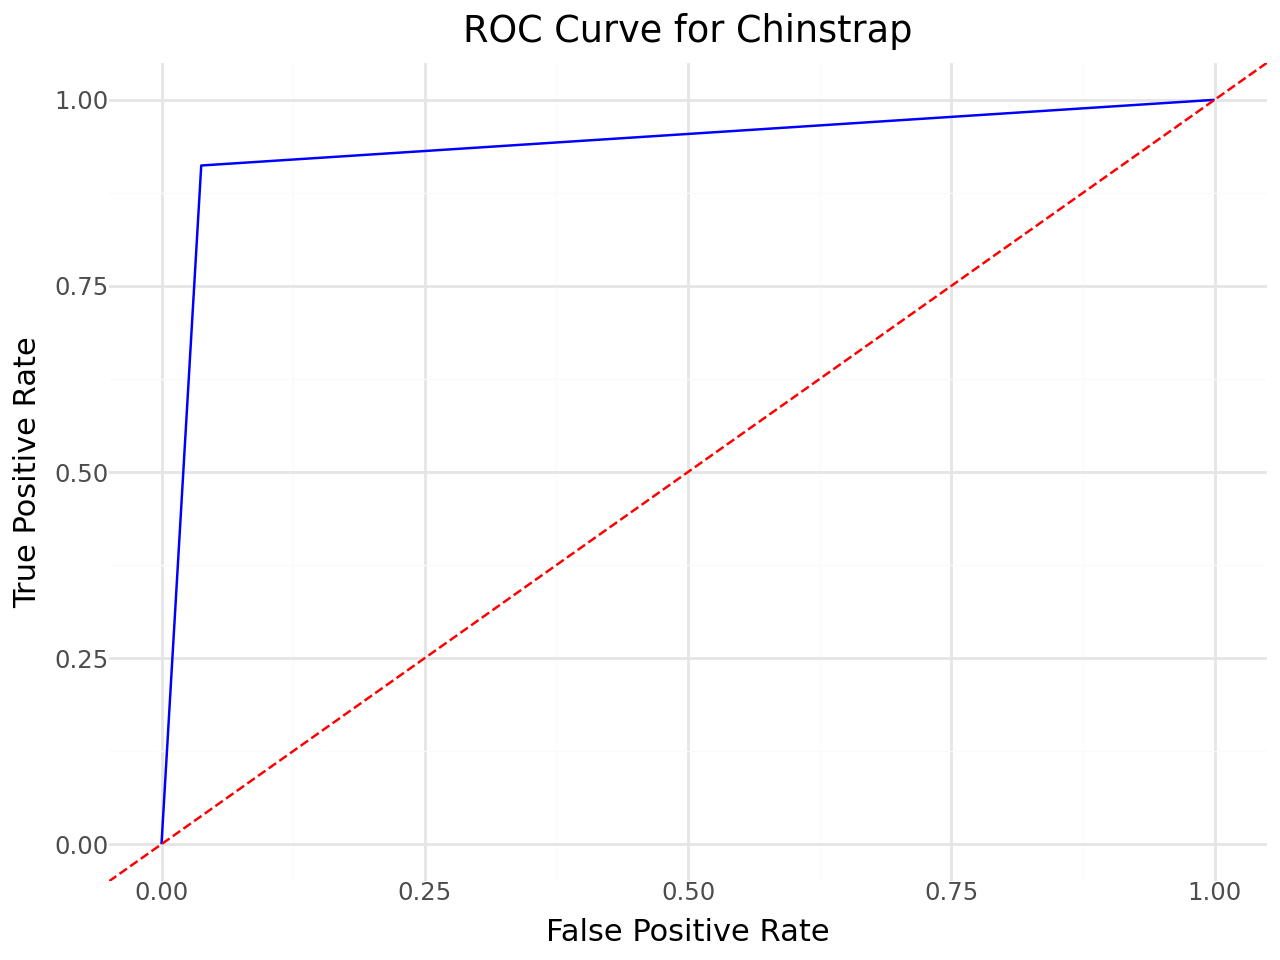

In [126]:
# ROC plot - Chinstrap

y_chinstrap = (y == "Chinstrap")
y_pred_chinstrap = cross_val_predict(knn_10, X, y_chinstrap, cv=5)

fpr, tpr, _ = roc_curve(y_chinstrap, y_pred_chinstrap)
roc_auc = roc_auc_score(y_chinstrap, y_pred_chinstrap)


roc_df = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
})


(ggplot(roc_df, aes(x='FPR', y='TPR'))
 + geom_line(color = 'blue')
 + geom_abline(linetype='--', color='red')
 + ggtitle('ROC Curve for Chinstrap')
 + xlab('False Positive Rate')
 + ylab('True Positive Rate')
 + theme_minimal()
 )